In [1]:
# Load Stanford Police California Data set
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # import the os module

#bring the data set in with selected columns
selected_features = [
    'driver_race',
    'driver_gender',
    'driver_age_raw',  
    'stop_outcome',
    'search_conducted'
    
]

#create my file path
file_path ='/kaggle/input/stanford-open-policing-project-california/CA_2013_onwards.csv'
# use my file path to access specific columns relevant to my narrative
data = pd.read_csv(file_path, usecols = selected_features)

#data preprocessing

data = data.dropna(subset=['driver_race', 'driver_gender','driver_age_raw','search_conducted' ])


# checks if certain values are in 'stop_outcome' then negates them/excludes them.Clerk Codes
data = data[~data['stop_outcome'].isin(['CHP 215', 'CHP 281'])]
print(data['driver_race'].value_counts())
#checks if certain races are in 'driver_race', strictly limits the dataset to the majority of races
data = data[data['driver_race'].isin(['Asian', 'Black', 'Hispanic','White'])]

#for storage purporses, randomly selected 750000 entries
data = data.sample(n=750000, random_state=42)

data.to_csv('reduced_dataset.csv', index=False)
print("Cleaned and reduced dataset saved successfully!")








driver_race
White       3314976
Hispanic    2505927
Black        636038
Asian        516037
Other        506879
Name: count, dtype: int64
Cleaned and reduced dataset saved successfully!


  driver_gender driver_age_raw driver_race  search_conducted  \
0             M          15-25       Asian             False   
1             M          33-39       White             False   
2             M            49+       White             False   
3             M          40-48    Hispanic             False   
4             F          15-25    Hispanic             False   

              stop_outcome  
0           Verbal Warning  
1           Verbal Warning  
2           Verbal Warning  
3  Motorist/Public Service  
4           Verbal Warning  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   driver_gender     750000 non-null  object
 1   driver_age_raw    750000 non-null  object
 2   driver_race       750000 non-null  object
 3   search_conducted  750000 non-null  bool  
 4   stop_outcome      750000 non-null  object
dt

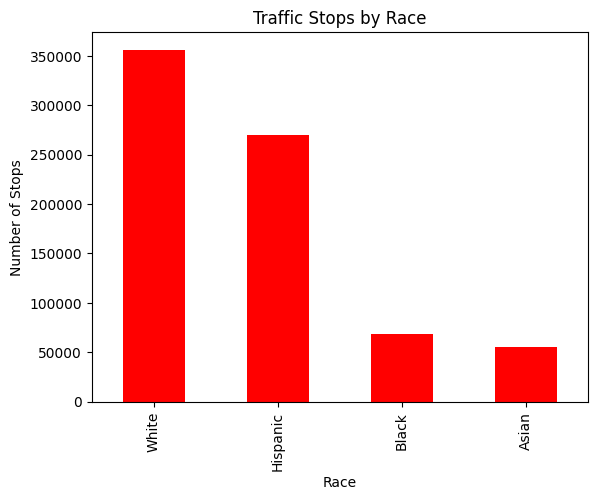

In [2]:
import pandas as pd

#saved reduced dataset
data = pd.read_csv('reduced_dataset.csv')

#first rows
print(data.head())

#dataset make up
print(data.info())

#race frequencies 
print(data['driver_race'].value_counts())

#age frequencies 
print(data['driver_age_raw'].value_counts())


#search frequencies 
print(data['search_conducted'].value_counts())


#outcome frequencies
print(data['stop_outcome'].value_counts())

#gender frequencies 
print(data['driver_gender'].value_counts())




import matplotlib.pyplot as plt
import seaborn as sns

#exploring race distrubution
race_count = data['driver_race'].value_counts()
race_count.plot(kind='bar', title='Traffic Stops by Race', color = 'red')
plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.show()



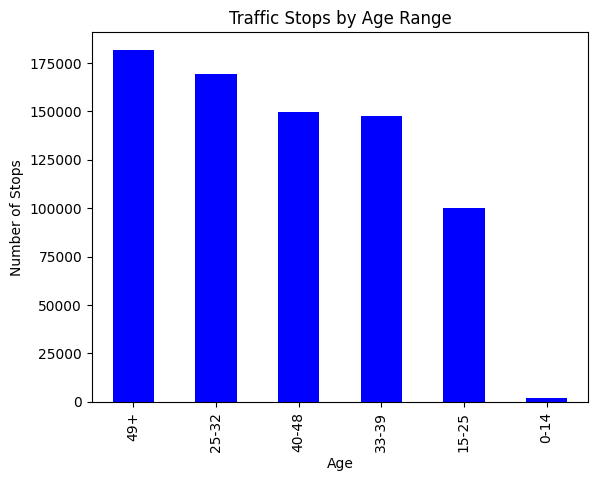

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#exploring age distrubution
age_count = data['driver_age_raw'].value_counts()
age_count.plot(kind='bar', title='Traffic Stops by Age Range', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Number of Stops')
plt.show()



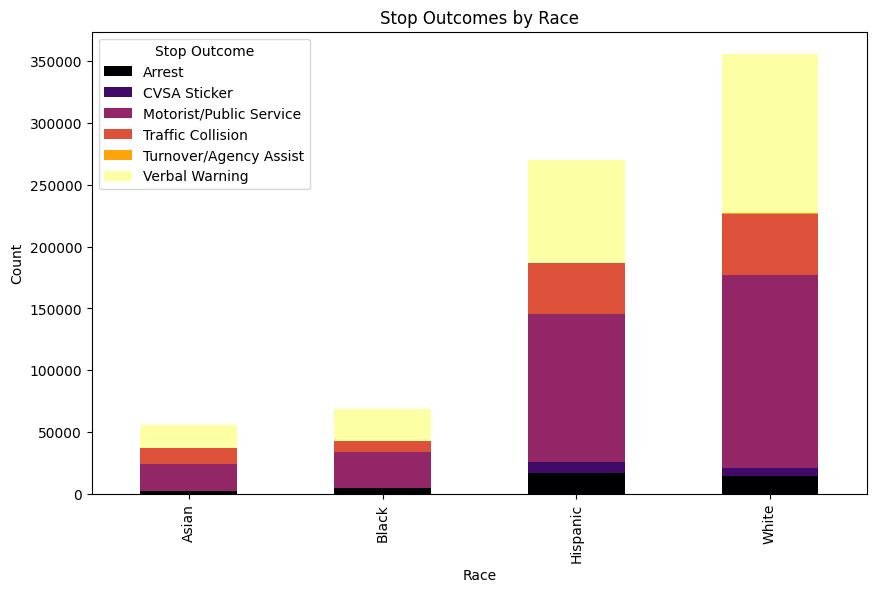

In [4]:
#compare stopoutcomes by the race of drivers
outcome_by_race = data.groupby('driver_race')['stop_outcome'].value_counts().unstack()

#visualize the relationship w/ stack chgart
outcome_by_race.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='inferno')
plt.title('Stop Outcomes by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Stop Outcome')
plt.show()

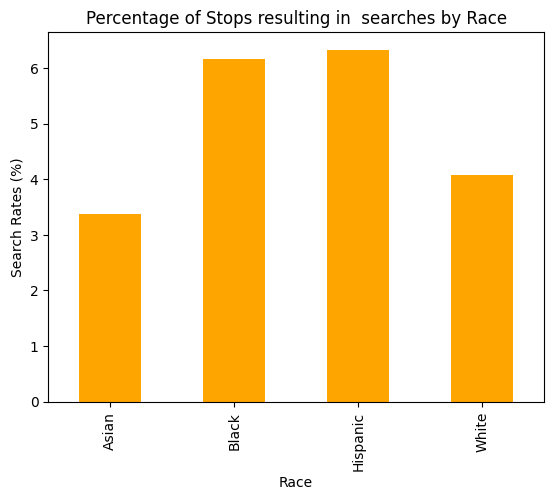

In [5]:
#visualizing the search rates by race
search_rates = data.groupby('driver_race')['search_conducted'].mean() *100

#plotting bar
search_rates.plot(kind='bar',color='orange')
plt.title('Percentage of Stops resulting in  searches by Race')
plt.xlabel('Race')
plt.ylabel('Search Rates (%)')
plt.show()


In [6]:
#method - one hot encode categorical variables drivers race 
# Add weights based on inverse group size
#data['race_weight'] = data['driver_race'].map({
    #'Hispanic': 1 / 2505927,
    #'Black': 1 / 636038,
    #'Asian': 1 / 516037,
    #'White': 1/ 3314976,
    
#})

# Map age ranges to numerical values
# I originally assigned the middle point value of each age range but that isn't representative of the dataset. Instead I will use ordinal encoding to assign group values
age_mapping = ({
    '15-25': 2,     # Approximation for "less than 18"
    '25-32': 3,
    '33-39': 4,
    '40-48': 5,
    '49+': 6,
    '0-14': 1,
})

# Replace ranges with numerical values
data['driver_age'] = data['driver_age_raw'].map(age_mapping)

# Verify the changes
print(data['driver_age'].head())
data = pd.get_dummies(data, columns=['driver_race'], drop_first=False)

# Ensure (convert True/False to 0/1)
race_columns = ['driver_race_Hispanic', 'driver_race_Black', 'driver_race_Asian','driver_race_White']
data[race_columns] = data[race_columns].astype(int)

data['driver_gender'] = (data['driver_gender'] == 'M').astype(int)
# Define 'is_punished' as a combination of negative outcomes (verbal warning is the goodoutcome)
data['is_punished'] = ((data['stop_outcome'] == 'Arrest') |  # Arrest
                       (data['stop_outcome'].isin(['Citation', 'CVSA Sticker','Motorist/Public Service']))).astype(int)

# Check the new target distribution
print(data['is_punished'].value_counts())

data = data.drop('stop_outcome',axis =1)
data = data.drop('search_conducted', axis = 1)
data = data.drop('driver_age_raw',axis =1)




print(data.columns)
data.head()

0    2
1    4
2    6
3    5
4    2
Name: driver_age, dtype: int64
is_punished
1    379642
0    370358
Name: count, dtype: int64
Index(['driver_gender', 'driver_age', 'driver_race_Asian', 'driver_race_Black',
       'driver_race_Hispanic', 'driver_race_White', 'is_punished'],
      dtype='object')


,driver_gender,driver_age,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_White,is_punished
0,1,2,1,0,0,0,0
1,1,4,0,0,0,1,0
2,1,6,0,0,0,1,0
3,1,5,0,0,1,0,1
4,0,2,0,0,1,0,0



Logistic Regression Metrics:
Accuracy Score: 0.5063466666666666
Confusion Matrix:
 [[     0 111072]
 [     0 113928]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    111072
           1       0.51      1.00      0.67    113928

    accuracy                           0.51    225000
   macro avg       0.25      0.50      0.34    225000
weighted avg       0.26      0.51      0.34    225000


Logistic Regression Feature Importance:
                Feature  Coefficient
4  driver_race_Hispanic     0.657319
3     driver_race_Black     0.475371
5     driver_race_White     0.453296
2     driver_race_Asian     0.260002
0         driver_gender     0.210784
1            driver_age     0.122164


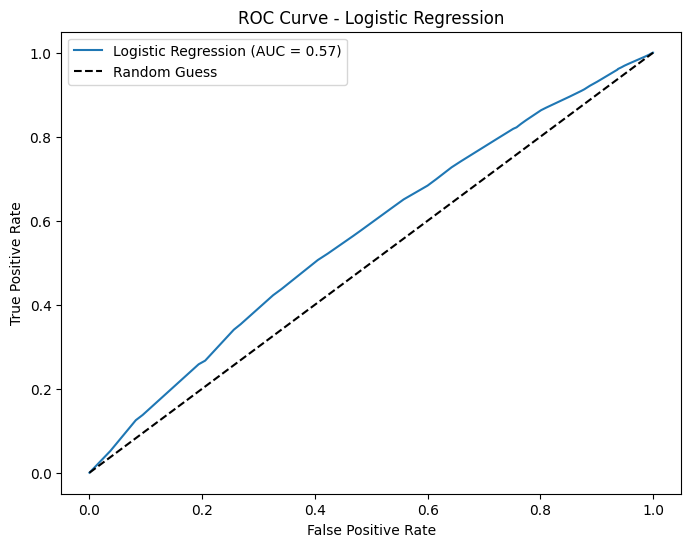


Random Forest Metrics:
Accuracy Score: 0.5521777777777778
Confusion Matrix:
 [[68056 43016]
 [57744 56184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57    111072
           1       0.57      0.49      0.53    113928

    accuracy                           0.55    225000
   macro avg       0.55      0.55      0.55    225000
weighted avg       0.55      0.55      0.55    225000


Random Forest Feature Importance:
                Feature  Importance
1            driver_age    0.563509
0         driver_gender    0.212764
4  driver_race_Hispanic    0.126224
2     driver_race_Asian    0.057786
5     driver_race_White    0.027248
3     driver_race_Black    0.012468


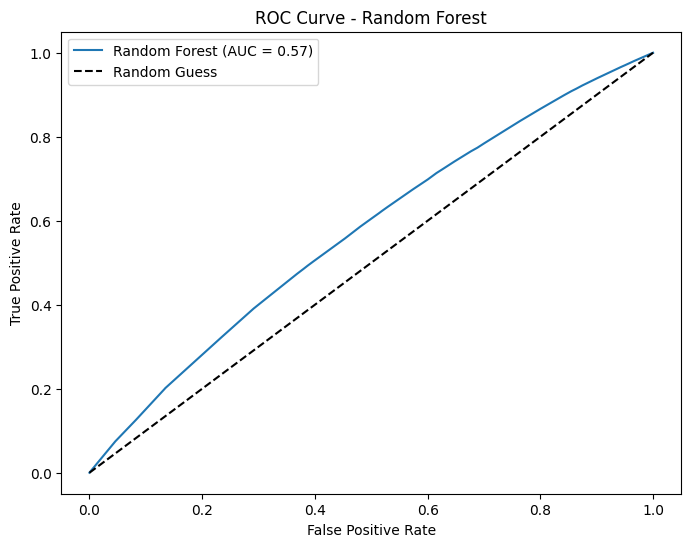


Model Comparison:
Logistic Regression ROC-AUC: 0.57
Random Forest ROC-AUC: 0.57


In [7]:
# Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = data.drop(['is_punished'], axis=1)
y = data['is_punished']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set for oversampling
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Distribution - SMOTE
#print("Before SMOTE: ", y_train.value_counts())
#print("After SMOTE: ", y_train_resampled.value_counts())

# Assign higher weights to punishment cases
class_weights = {0: 1, 1: 20}  # Assign a higher weight to the minority class

# Logistic Regression with class weights
log_model = LogisticRegression(class_weight=class_weights, max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Adjust the threshold
y_probs = log_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.7).astype(int)  # Lower threshold to 0.3


# Eval LogisticRegression
#y_pred = log_model.predict(X_test)
print("\nLogistic Regression Metrics:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Logistic Regression Feature Importance
coefs = log_model.coef_[0]
features = X.columns
log_feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
log_feature_importance = log_feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nLogistic Regression Feature Importance:")
print(log_feature_importance)

# ROC Curve for Logistic Regression
y_probs_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_log)
roc_auc_log = roc_auc_score(y_test, y_probs_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Metrics:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(rf_feature_importance)

# ROC Curve for Random Forest
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

# Compare Models
print("\nModel Comparison:")
print(f"Logistic Regression ROC-AUC: {roc_auc_log:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")



In [8]:
from sklearn.metrics import roc_auc_score
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs_rf)
print(f"ROC-AUC Score: {auc}")

from sklearn.utils import resample
test_data = pd.concat([X_test, y_test], axis=1)
minority = test_data[test_data['is_punished'] == 1]
majority = test_data[test_data['is_punished'] == 0]
balanced_test = pd.concat([resample(majority, replace=True, n_samples=len(minority), random_state=42), minority])

#Extract features and target from the balanced test set
X_test_balanced = balanced_test.drop(['is_punished'], axis=1)
y_test_balanced = balanced_test['is_punished']

# Predict on the balanced test set
y_pred_balanced = log_model.predict(X_test_balanced)

# Eval model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on balanced test set:", accuracy_score(y_test_balanced, y_pred_balanced))
print("Classification Report on balanced test set:")
print(classification_report(y_test_balanced, y_pred_balanced))
print("Confusion Matrix on balanced test set:")
print(confusion_matrix(y_test_balanced, y_pred_balanced))






importances = rf_model.feature_importances_
for name, importance in zip(X.columns, importances):
    print(f"{name}: {importance}")

coefs = log_model.coef_[0]
for name, coef in zip(X.columns, coefs):
    print(f"{name}: {coef}")




ROC-AUC Score: 0.574084444153139
Accuracy on balanced test set: 0.5
Classification Report on balanced test set:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    113928
           1       0.50      1.00      0.67    113928

    accuracy                           0.50    227856
   macro avg       0.25      0.50      0.33    227856
weighted avg       0.25      0.50      0.33    227856

Confusion Matrix on balanced test set:
[[     0 113928]
 [     0 113928]]
driver_gender: 0.21276438467374062
driver_age: 0.5635089230085795
driver_race_Asian: 0.057786342804266366
driver_race_Black: 0.012467946637796443
driver_race_Hispanic: 0.12622400802371714
driver_race_White: 0.027248394851899976
driver_gender: 0.21078432309784828
driver_age: 0.12216352804502865
driver_race_Asian: 0.26000163409111376
driver_race_Black: 0.475370598548154
driver_race_Hispanic: 0.6573188506919684
driver_race_White: 0.45329646648554445


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


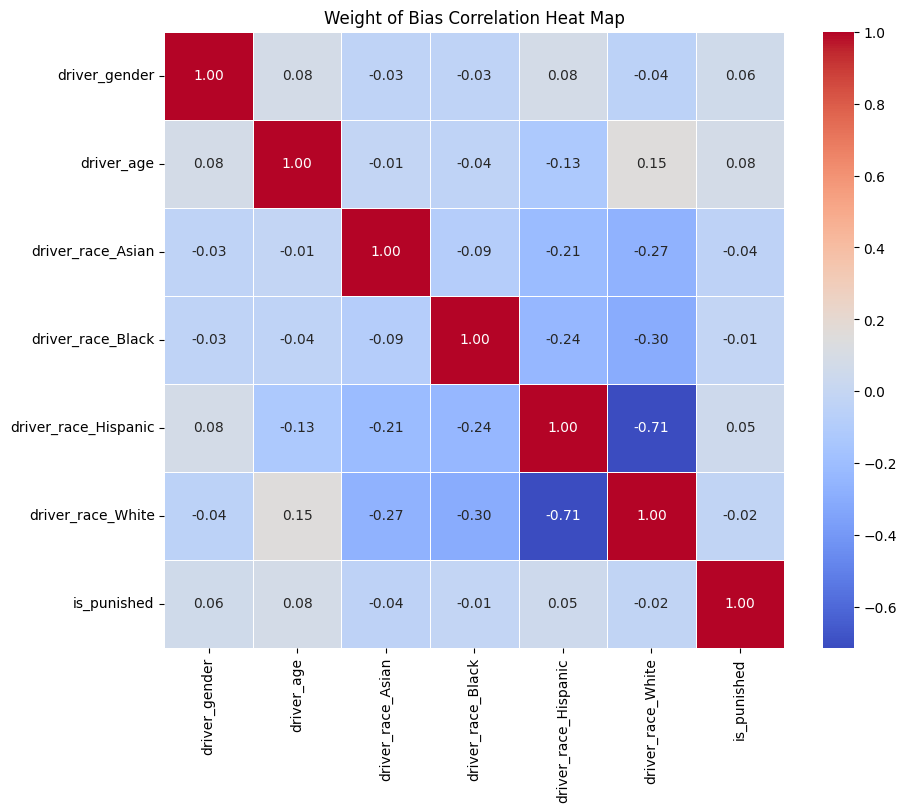

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# A visualization of data correlation 
correalation_matrix = data.corr()

# heat map
plt.figure(figsize=(10,8))
sns.heatmap(correalation_matrix,annot = True , cmap ='coolwarm',fmt = '.2f',linewidths = 0.5)
plt.title('Weight of Bias Correlation Heat Map')
plt.show()


